In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
print(df.sample(5))

      RowNumber  CustomerId        Surname  CreditScore Geography  Gender  \
6327       6328    15793856        Abdulov          667     Spain  Female   
9704       9705    15759872             L?          625    France    Male   
4505       4506    15628583  Iweobiegbunam          709    France  Female   
4903       4904    15628530          Booth          694    France    Male   
722         723    15736879         Obinna          669    France    Male   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6327   36       3  121542.57              2          1               1   
9704   22       9       0.00              2          1               0   
4505   30       5       0.00              2          0               1   
4903   42       3  156864.20              2          0               0   
722    23       1       0.00              2          0               0   

      EstimatedSalary  Exited  
6327        186841.71       0  
9704        157072.91       

In [5]:
if 'CustomerId' in df.columns:
    df.drop('CustomerId', axis='columns', inplace=True)
    print("CustomerId column dropped successfully.")
else:
    print("CustomerId column not found, likely already dropped in a previous run.")

CustomerId column dropped successfully.


In [6]:
print(df.dtypes)

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [7]:
print(df.Exited.values)

[1 0 1 ... 1 1 0]


In [8]:
print(df.EstimatedSalary.values[:10])

[101348.88 112542.58 113931.57  93826.63  79084.1  149756.71  10062.8
 119346.88  74940.5   71725.73]


# Checking for Non Numeric Values

In [9]:
print(pd.to_numeric(df.Exited, errors='coerce').isnull().sum())
print("Rows with non-numeric 'Exited' values (if any):")
print(df[pd.to_numeric(df.Exited, errors='coerce').isnull()])

0
Rows with non-numeric 'Exited' values (if any):
Empty DataFrame
Columns: [RowNumber, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [10]:
df.shape

(10000, 13)

In [11]:
print(df.iloc[488]['Exited'])

0


In [12]:
df1 = df[df.Exited == 1].copy()

In [13]:
df.shape

(10000, 13)

In [14]:
df1.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df1.Exited = pd.to_numeric(df1.Exited)

In [16]:
print(df1.Exited.dtypes)

int64


In [17]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping_duplicates = df.shape[0]

if initial_rows > rows_after_dropping_duplicates:
    print(f"Removed {initial_rows - rows_after_dropping_duplicates} duplicate rows.")
else:
    print("No duplicate rows found.")
print(f"DataFrame shape after duplicate removal: {df.shape}")

No duplicate rows found.
DataFrame shape after duplicate removal: (10000, 13)


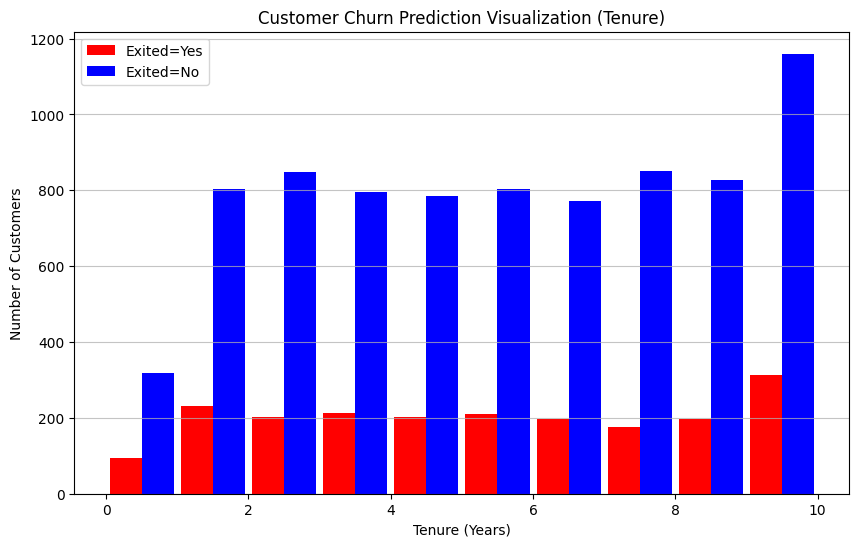

In [18]:
tenure_exited_no = df[df.Exited == 0].Tenure
tenure_exited_yes = df[df.Exited == 1].Tenure

plt.figure(figsize=(10, 6))
plt.xlabel("Tenure (Years)")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization (Tenure)")
plt.hist([tenure_exited_yes, tenure_exited_no], color=['red','blue'], label=['Exited=Yes','Exited=No'], bins=10, rwidth=0.9)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

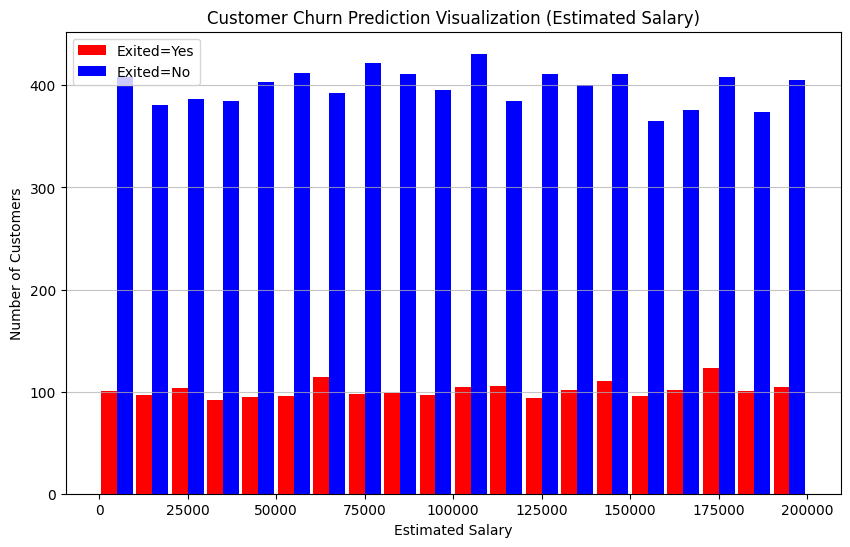

In [19]:
mc_exited_no = df[df.Exited == 0].EstimatedSalary
mc_exited_yes = df[df.Exited == 1].EstimatedSalary

plt.figure(figsize=(10, 6))
plt.xlabel("Estimated Salary")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization (Estimated Salary)")
plt.hist([mc_exited_yes, mc_exited_no], color=['red','blue'], label=['Exited=Yes','Exited=No'], bins=20, rwidth=0.9)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [20]:
def print_unique_col_values(df_to_check):
    print("--- Unique values in object (categorical) columns ---")
    for column in df_to_check:
        if df_to_check[column].dtype == 'object':
            print(f'{column} : {df_to_check[column].unique()}')

print_unique_col_values(df)

--- Unique values in object (categorical) columns ---
Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [21]:
if 'Surname' in df.columns:
    df.drop('Surname', axis='columns', inplace=True)
    print("'Surname' column dropped successfully.")
else:
    print("'Surname' column not found, perhaps already dropped.")

if 'RowNumber' in df.columns:
    df.drop('RowNumber', axis='columns', inplace=True)
    print("'RowNumber' column dropped successfully.")
else:
    print("'RowNumber' column not found, perhaps already dropped.")

print("\nColumns in df after dropping 'Surname' and 'RowNumber':")
print(df.columns)

'Surname' column dropped successfully.
'RowNumber' column dropped successfully.

Columns in df after dropping 'Surname' and 'RowNumber':
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [22]:
df['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
print("Unique values in 'Gender' after replacement:")
print(df['Gender'].unique())

Unique values in 'Gender' after replacement:
['F' 'M']


C:\Users\PC\AppData\Local\Temp\ipykernel_13384\1959494644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)


In [23]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True, dtype=int)

print("\nDataFrame columns and dtypes after one-hot encoding:")
print(df_encoded.dtypes)
print("\nFirst 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())


DataFrame columns and dtypes after one-hot encoding:
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Gender_M               int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object

First 5 rows of the DataFrame after one-hot encoding:
   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Gender_M  Geography_Germany  \
0               1        101348.88       1   

In [24]:
print(df_encoded.dtypes)

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Gender_M               int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object


In [25]:
X = df_encoded.drop('Exited', axis='columns')
y = df_encoded['Exited']

In [26]:
scaler_standard = StandardScaler()
X_scaled_standard = scaler_standard.fit_transform(X)
X_scaled_standard_df = pd.DataFrame(X_scaled_standard, columns=X.columns)

print("First 5 rows of features (X) AFTER Standard Scaling:")
print(X_scaled_standard_df.head())
print("\nDescription of features AFTER Standard Scaling (note mean close to 0, std close to 1):")
print(X_scaled_standard_df.describe())

First 5 rows of features (X) AFTER Standard Scaling:
   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583   0.646092   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583  -1.547768   
2    -1.536794  0.293517  1.032908  1.333053       2.527057   0.646092   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737  -1.547768   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583   0.646092   

   IsActiveMember  EstimatedSalary  Gender_M  Geography_Germany  \
0        0.970243         0.021886 -1.095988          -0.578736   
1        0.970243         0.216534 -1.095988          -0.578736   
2       -1.030670         0.240687 -1.095988          -0.578736   
3       -1.030670        -0.108918 -1.095988          -0.578736   
4        0.970243        -0.365276 -1.095988          -0.578736   

   Geography_Spain  
0        -0.573809  
1         1.742740  
2        -0.573809  
3        -0.573

In [27]:
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(X)
X_scaled_minmax_df = pd.DataFrame(X_scaled_minmax, columns=X.columns)

print("First 5 rows of features (X) AFTER Min-Max Scaling:")
print(X_scaled_minmax_df.head())
print("\nDescription of features AFTER Min-Max Scaling (note min=0, max=1):")
print(X_scaled_minmax_df.describe())

First 5 rows of features (X) AFTER Min-Max Scaling:
   CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538  0.324324     0.2  0.000000       0.000000        1.0   
1        0.516  0.310811     0.1  0.334031       0.000000        0.0   
2        0.304  0.324324     0.8  0.636357       0.666667        1.0   
3        0.698  0.283784     0.1  0.000000       0.333333        0.0   
4        1.000  0.337838     0.2  0.500246       0.000000        1.0   

   IsActiveMember  EstimatedSalary  Gender_M  Geography_Germany  \
0             1.0         0.506735       0.0                0.0   
1             1.0         0.562709       0.0                0.0   
2             0.0         0.569654       0.0                0.0   
3             0.0         0.469120       0.0                0.0   
4             1.0         0.395400       0.0                0.0   

   Geography_Spain  
0              0.0  
1              1.0  
2              0.0  
3              0.0  
4      

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_minmax_df, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
X_train.shape

(8000, 11)

In [30]:
X_test.shape

(2000, 11)

In [31]:
y_train.shape

(8000,)

In [32]:
y_test.shape

(2000,)

In [33]:
X_train.columns.tolist()

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Gender_M',
 'Geography_Germany',
 'Geography_Spain']

In [34]:
X_test.columns.tolist()

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Gender_M',
 'Geography_Germany',
 'Geography_Spain']

In [35]:
len(X_train)

8000

In [36]:
len(X_test)

2000

In [37]:
len(y_train)

8000

In [38]:
len(y_test)

2000

In [39]:
len(X_train.columns)

11

In [40]:
model_nn = keras.Sequential([
    keras.layers.Dense(20, input_shape=(len(X_train.columns),), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_nn.fit(X_train, y_train, epochs=100, verbose=0)
print("Neural Network Model Training Complete.")

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Model Training Complete.


In [41]:
loss_nn, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Model Loss on Test Set: {loss_nn:.4f}")
print(f"Neural Network Model Accuracy on Test Set: {accuracy_nn:.4f}")

Neural Network Model Loss on Test Set: 0.3349
Neural Network Model Accuracy on Test Set: 0.8665


In [42]:
yp_nn = model_nn.predict(X_test)
y_pred_nn = (yp_nn > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [43]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.47      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000



In [44]:
cm_nn = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_nn)

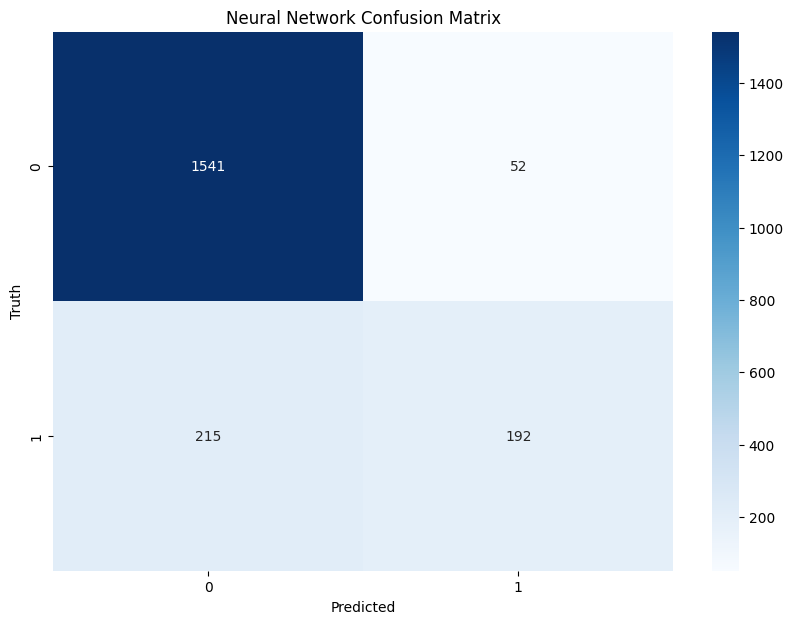

In [45]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Neural Network Confusion Matrix')
plt.show()

In [46]:
overall_accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_class_1_nn = precision_score(y_test, y_pred_nn, pos_label=1)
recall_class_1_nn = recall_score(y_test, y_pred_nn, pos_label=1)
precision_class_0_nn = precision_score(y_test, y_pred_nn, pos_label=0)
recall_class_0_nn = recall_score(y_test, y_pred_nn, pos_label=0)

print(f"\nNeural Network Overall Accuracy: {overall_accuracy_nn:.4f}")
print(f"Neural Network Precision (Class 0 - Not Exited): {precision_class_0_nn:.4f}")
print(f"Neural Network Precision (Class 1 - Exited): {precision_class_1_nn:.4f}")
print(f"Neural Network Recall (Class 0 - Not Exited): {recall_class_0_nn:.4f}")
print(f"Neural Network Recall (Class 1 - Exited): {recall_class_1_nn:.4f}")


Neural Network Overall Accuracy: 0.8665
Neural Network Precision (Class 0 - Not Exited): 0.8776
Neural Network Precision (Class 1 - Exited): 0.7869
Neural Network Recall (Class 0 - Not Exited): 0.9674
Neural Network Recall (Class 1 - Exited): 0.4717


In [47]:
model_lr = LogisticRegression(random_state=42, solver='liblinear')
model_lr.fit(X_train, y_train)
print("Logistic Regression Model Training Complete.")

Logistic Regression Model Training Complete.


In [48]:
y_pred_lr = model_lr.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.61      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



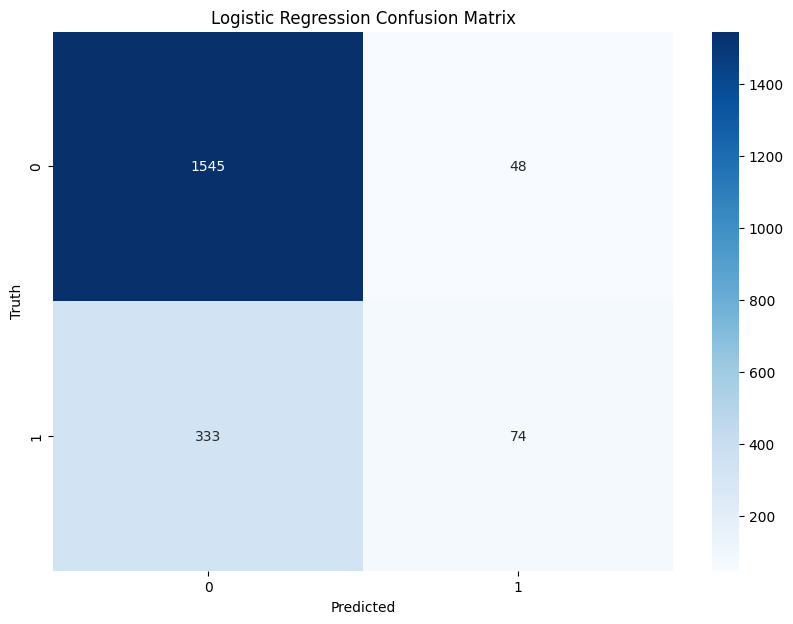

In [50]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize = (10,7))
sn.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [51]:
overall_accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_class_1_lr = precision_score(y_test, y_pred_lr, pos_label=1)
recall_class_1_lr = recall_score(y_test, y_pred_lr, pos_label=1)
precision_class_0_lr = precision_score(y_test, y_pred_lr, pos_label=0)
recall_class_0_lr = recall_score(y_test, y_pred_lr, pos_label=0)

print(f"\nLogistic Regression Overall Accuracy: {overall_accuracy_lr:.4f}")
print(f"Logistic Regression Precision (Class 0 - Not Exited): {precision_class_0_lr:.4f}")
print(f"Logistic Regression Precision (Class 1 - Exited): {precision_class_1_lr:.4f}")
print(f"Logistic Regression Recall (Class 0 - Not Exited): {recall_class_0_lr:.4f}")
print(f"Logistic Regression Recall (Class 1 - Exited): {recall_class_1_lr:.4f}")


Logistic Regression Overall Accuracy: 0.8095
Logistic Regression Precision (Class 0 - Not Exited): 0.8227
Logistic Regression Precision (Class 1 - Exited): 0.6066
Logistic Regression Recall (Class 0 - Not Exited): 0.9699
Logistic Regression Recall (Class 1 - Exited): 0.1818


In [52]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
print("Random Forest Model Training Complete.")

Random Forest Model Training Complete.


In [53]:
y_pred_rf = model_rf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.78      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



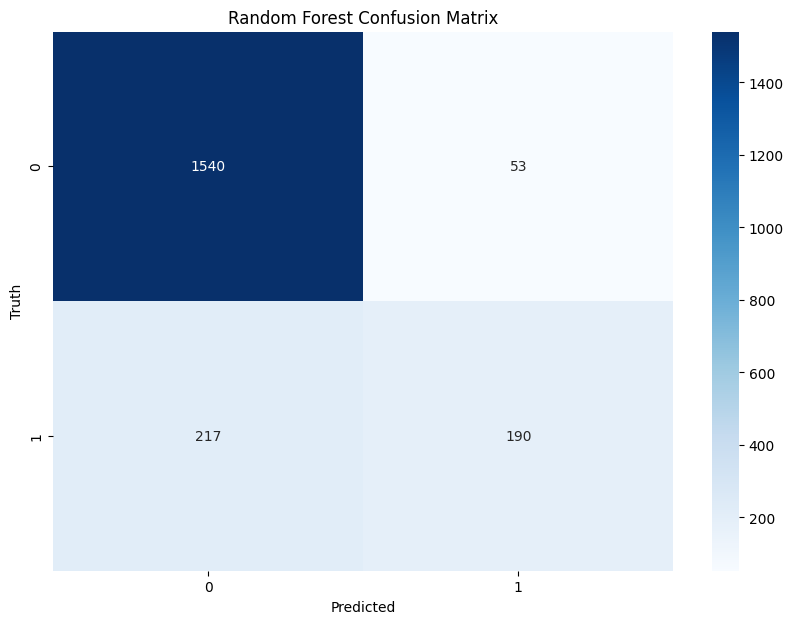

In [55]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (10,7))
sn.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [56]:
overall_accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_class_1_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_class_1_rf = recall_score(y_test, y_pred_rf, pos_label=1)
precision_class_0_rf = precision_score(y_test, y_pred_rf, pos_label=0)
recall_class_0_rf = recall_score(y_test, y_pred_rf, pos_label=0)

print(f"\nRandom Forest Overall Accuracy: {overall_accuracy_rf:.4f}")
print(f"Random Forest Precision (Class 0 - Not Exited): {precision_class_0_rf:.4f}")
print(f"Random Forest Precision (Class 1 - Exited): {precision_class_1_rf:.4f}")
print(f"Random Forest Recall (Class 0 - Not Exited): {recall_class_0_rf:.4f}")
print(f"Random Forest Recall (Class 1 - Exited): {recall_class_1_rf:.4f}")


Random Forest Overall Accuracy: 0.8650
Random Forest Precision (Class 0 - Not Exited): 0.8765
Random Forest Precision (Class 1 - Exited): 0.7819
Random Forest Recall (Class 0 - Not Exited): 0.9667
Random Forest Recall (Class 1 - Exited): 0.4668


In [57]:
sample_customer_data = X_test.iloc[0:1]
true_label = y_test.iloc[0]

predicted_churn_rf = model_rf.predict(sample_customer_data)
predicted_churn_proba_rf = model_rf.predict_proba(sample_customer_data)[:, 1]

print(f"Sample Customer Features:\n{sample_customer_data.to_string()}")
print(f"\nTrue Churn Status: {true_label}")
print(f"Random Forest Predicted Churn Status: {predicted_churn_rf[0]}")
print(f"Random Forest Predicted Churn Probability: {predicted_churn_proba_rf[0]:.4f}")

Sample Customer Features:
      CreditScore       Age  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Gender_M  Geography_Germany  Geography_Spain
5702         0.47  0.243243     0.7      0.0       0.333333        1.0             0.0         0.471403       1.0                0.0              0.0

True Churn Status: 0
Random Forest Predicted Churn Status: 0
Random Forest Predicted Churn Probability: 0.0600


In [58]:
import pickle

In [59]:
with open('min_max_scaler.pkl', 'wb') as f:
    pickle.dump(scaler_minmax, f)
print("MinMaxScaler saved as min_max_scaler.pkl")

MinMaxScaler saved as min_max_scaler.pkl


In [60]:
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model_lr, f)
print("Logistic Regression model saved as logistic_regression_model.pkl")

Logistic Regression model saved as logistic_regression_model.pkl


In [61]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)
print("Random Forest model saved as random_forest_model.pkl")

Random Forest model saved as random_forest_model.pkl


In [62]:
model_nn.save('neural_network_model.h5')
print("Neural Network model saved as neural_network_model.h5")

print("\nAll necessary models and scaler have been saved.")

Neural Network model saved as neural_network_model.h5

All necessary models and scaler have been saved.
